# GPA score of students at King's Study


## A. Problem Statement

1. Building a logistic regression model to assign a score between 0 and 100 to each of the students which can be used by the King's College Nepal to provide scholarships to potential candidate students.
2. Creating a model that can adjust according to the college's requirements
    - When the college's mission is to support academic excellence and financial need, the focus is to identify all deserving students for scholarship opportunities.
    - When the college's commitment centers on fiscal responsibility and the equitable distribution of resources, the priority is to carefully manage scholarship allocations to ensure fairness and sustainability.

#### Importing Revelant Libraries

In [431]:
# imporitng relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [432]:
# retrieving data

data = pd.read_csv('GPA.csv')
data

,Program,Enrollment Year,Gender,DOB,District,Country,Education Background,GPA,Professional Engagement,Mothers Profession,Fathers Profession,Status,Withdrawn or Graduate Date (mm.dd.yy),Reason for Withdrawal,Year,Actual Concentration
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MBA,2019.0,Male,29/11/1993,Kathmandu,Nepal,Bachelor of Business Administration,3.41,Unemployed,Business,Business,Withdrawn,"March 15, 2020",Abroad Study,2020,Pending
2,MBA,2019.0,Male,11/14/1994,Kaski,Nepal,Bachelor of Business Administration,3.08,Unemployed,Housewife,Businessman,Graduate,"August 21, 2021",NaN,2021,Marketing Management
3,MBA,2019.0,Female,10/02/1997,Mahottari,Nepal,Bachelor of Business Administration,2.86,Employed,NGO worker,NGO worker,Graduate,"August 21, 2021",NaN,2021,Entrepreneurship
4,MBA,2019.0,Male,10/06/1995,Kathmandu,Nepal,Bachelor of Business Administration,2.99,Employed,Housewife,Business,Withdrawn,"December 30, 2019",Work Commitment,2019,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,BSIT,2023.0,Male,02/19/2004,Bhaktapur,Nepal,Intermediate Level,2.61,NaN,NaN,NaN,Running,NaN,NaN,NaN,NaN
2571,BSIT,2023.0,Male,24/10/2004,Sindhuli,Nepal,A Level,3.5 credit,NaN,NaN,NaN,Running,NaN,NaN,NaN,NaN
2572,BSIT,2023.0,Male,02/27/2006,Kailali,Nepal,Intermediate Level,2.96,NaN,NaN,NaN,Running,NaN,NaN,NaN,NaN
2573,BSIT,2023.0,Male,09/30/2004,Kailali,Nepal,Intermediate Level,3.53,NaN,NaN,NaN,Running,NaN,NaN,NaN,NaN


In [433]:
data.isnull().sum()

Program                                    23
Enrollment Year                           147
Gender                                    146
DOB                                      1004
District                                  536
Country                                  1107
Education Background                      419
GPA                                      1036
Professional Engagement                   999
Mothers Profession                       1382
Fathers Profession                       1368
Status                                    149
Withdrawn or Graduate Date (mm.dd.yy)     964
Reason for Withdrawal                    1957
Year                                      249
Actual Concentration                      485
dtype: int64

In [434]:
data.shape

(2575, 16)

# B. Data Preparation and EDA

In [435]:
# checking the percentage of missing values 

round(data.isnull().sum()/len(data),2)

Program                                  0.01
Enrollment Year                          0.06
Gender                                   0.06
DOB                                      0.39
District                                 0.21
Country                                  0.43
Education Background                     0.16
GPA                                      0.40
Professional Engagement                  0.39
Mothers Profession                       0.54
Fathers Profession                       0.53
Status                                   0.06
Withdrawn or Graduate Date (mm.dd.yy)    0.37
Reason for Withdrawal                    0.76
Year                                     0.10
Actual Concentration                     0.19
dtype: float64

#### Dropping rows with missing high percentage of missing values

In [436]:
data.drop('Withdrawn or Graduate Date (mm.dd.yy)', axis =1, inplace = True)

- 'Withdrawn or Graduate Date (mm.dd.yy)' column does not contain necessary informations for our model

In [437]:
data.drop('DOB', axis =1, inplace = True)

- 'DOB' column does not contain necessary informations for our model

In [438]:
data.drop('Reason for Withdrawal', axis = 1, inplace=True)

- 'Reason for Withdrawal' column does not contain necessary informations for our model

In [439]:
data.drop('Year', axis = 1, inplace=True)

- 'Year' column does not contain necessary informations for our model

#### Dropping null values in the GPA column

In [440]:
data = data.dropna(subset=['GPA'])

In [441]:
# checking the percentage of missing values 

round(data.isnull().sum()/len(data),2)

Program                    0.00
Enrollment Year            0.01
Gender                     0.01
District                   0.15
Country                    0.45
Education Background       0.09
GPA                        0.00
Professional Engagement    0.35
Mothers Profession         0.45
Fathers Profession         0.44
Status                     0.04
Actual Concentration       0.20
dtype: float64

## Note

- 'Country', 'Professional Engagement', 'District', 'Mothers Profession', 'Fathers Profession', 'Actual Concentration' they might high number of missing values but they have important information for the problem statement. Doing some analysis on them

In [442]:
# replacing nan by 'Select_District' in 'District'

data['District'] = data['District'].replace(np.nan, 'Select_District')

In [443]:
# replacing nan by 'Select_Country' in 'Country'

data['Country'] = data['Country'].replace(np.nan, 'Select_Country')

In [444]:
# replacing nan by 'Select_EB' in 'Education Background'

data['Education Background'] = data['Education Background'].replace(np.nan, 'Select_EB')

In [445]:
# replacing nan by 'Select_PE' in 'Professional Engagement'

data['Professional Engagement'] = data['Professional Engagement'].replace(np.nan, 'Select_PE')

In [446]:
data['Gender'] = data['Gender'].replace(np.nan, 'Select_G')

In [447]:
# replacing nan by 'Select_Status' in 'Status'

data['Status'] = data['Status'].replace(np.nan, 'Select_Status')

In [448]:
# replacing nan by 'Select_AC' in 'Actual Concentration'

data['Actual Concentration'] = data['Actual Concentration'].replace(np.nan, 'Select_AC')

In [449]:
# replacing nan by 'Select_EY' in 'Enrollment Year'

data['Enrollment Year'] = data['Enrollment Year'].replace(np.nan, 'Select_EY')

#### Cleaning and Structuring Variable : Mothers Profession

In [450]:
data['Mothers Profession'].value_counts()

Housewife             234
House wife             73
Teacher                36
House Wife             34
Housewife              34
                     ... 
Passed away             1
entrepreneur            1
Reception-Incharge      1
BUSINESS WOMEN          1
Administrator           1
Name: Mothers Profession, Length: 224, dtype: int64

In [451]:
# Keywords to look for
keywords = ['house', 'huse', 'home', 'hou','hoise']

# Replace any value containing the keywords with 'HouseWife'
data['Mothers Profession'] = data['Mothers Profession'].apply(lambda x: 'HouseWife' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'


In [452]:
# Keywords to look for
keywords = ['business', 'entreprenuer', 'handicraft','same as mine', 'manger','retailer ','entrepreneur','pharmasicts','job', 'founder','own', 'wholesale' ,'self','entrepreneur','shopkeeper', 'service','studio']

# Replace any value containing the keywords with 'HouseWife'
data['Mothers Profession'] = data['Mothers Profession'].apply(lambda x: 'Businesswoman' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'


In [453]:
# Keywords to look for
keywords = ['employee','worker','teacher','md','beautician', 'principle','reception','investor', 'ngo', 'education', 'ingo','abroad','broker', 'banker', 'manager','director','freelancer','farmer','beauty','front','employed','health','artist','cabin','physiotherapist','student','phd','journalist','yoga','lancer','lekhapadi','engineer','lecturer','radiologist','doctor','writer','farming','admin','facilitator','accountant','lawyer','nurse','manufacturing','supervisor','sales','assistant','educator','agriculturer','principal','insurance','hospitality','service','foreign','trainer','organization','designer','ceo','social','cafeteria','architect','manager','tours','finance','bank','pilot','dermatologist']

# Replace any value containing the keywords with 'HouseWife'
data['Mothers Profession'] = data['Mothers Profession'].apply(lambda x: 'Employee_Mother' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [454]:
# Keywords to look for
keywords = ['government','human','police', 'office','handicraft','civil','mangerpharmasicts','servant','ministry','retired','retried']

# Replace any value containing the keywords with 'HouseWife'
data['Mothers Profession'] = data['Mothers Profession'].apply(lambda x: 'Government_Workers_Mother' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [455]:
# Keywords to look for
keywords = ['passed','moment','expired','not','maggie','uma','pun','renu','gurung','durga','no']

# Replace any value containing the keywords with 'HouseWife'
data['Mothers Profession'] = data['Mothers Profession'].apply(lambda x: 'Select_MothersP' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [456]:
data = data[data['Mothers Profession'] != 'N/a']

In [457]:
data = data[data['Mothers Profession'] != 'Na']

In [458]:
data = data[data['Mothers Profession'] != '-']

In [459]:
data = data[data['Mothers Profession'] != '- ']

In [460]:
data = data[data['Mothers Profession'] != '..']

In [461]:
data = data[data['Mothers Profession'] != '........']

In [462]:
data['Mothers Profession'] = data['Mothers Profession'].replace(np.nan, 'Select_MothersP')

In [463]:
data['Mothers Profession'].value_counts()

Select_MothersP              706
HouseWife                    493
Employee_Mother              169
Businesswoman                142
Government_Workers_Mother     25
Name: Mothers Profession, dtype: int64

#### Cleaning and Structuring Variable : Fathers Profession

In [464]:
data['Fathers Profession'].value_counts()

Businessman                    118
Business                        78
Business man                    38
Retired                         26
Businessman                     20
                              ... 
Executive Director               1
Professor/ Advocate              1
Head of Liaison Department       1
Expired                          1
Foreign Employee                 1
Name: Fathers Profession, Length: 355, dtype: int64

In [465]:
# Keywords to look for
keywords = ['business','retailer','buisness','bussiness','busniess','business owner','retail shop','bussinessman','wholesale trade of garment','business man','businessMan','buissnesman','business men','entreprenuer', 'retailer ','entrepreneur', 'founder','own','self','entrepreneur', 'service']

# Replace any value containing the keywords with 'HouseWife'
data['Fathers Profession'] = data['Fathers Profession'].apply(lambda x: 'Businessman' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'


In [466]:
# Keywords to look for
keywords = ['government','political','inspector','cpa','politicain','human','diplomat','retirement','nepal','govt','regional','goverenment','gov','politician','army','police', 'office','handicraft','civil','mangerpharmasicts','servant','ministry','retired','retried']

# Replace any value containing the keywords with 'HouseWife'
data['Fathers Profession'] = data['Fathers Profession'].apply(lambda x: 'Government_Workers_Father' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [467]:
# Keywords to look for
keywords = ['employee','peon','factory','operation','export','advisor','credit','teacher','md','cao','cook','dentist','plumber','uber','auditor','operator','management','guide','construction','research','conservationist','bureaucratic','electrician','referee','food','consultant','agriculture','commisner','chef','professor','hotelier','musician','proprietor','contractor','shopkeeper','share','pharmacist','project','department','job','state','instructor','restaurateur','ceramists','microbiologist','seivice','judge','advocate','seaman','astrologer','driver','mechanic','mechanics','media','security','stock','plastic','travel','driving','editor','guide''credit','wash','beautician', 'principle','reception','investor', 'ngo', 'education', 'ingo','abroad','broker', 'banker', 'manager','director','freelancer','farmer','beauty','front','employed','health','artist','cabin','physiotherapist','student','phd','journalist','yoga','lancer','lekhapadi','engineer','lecturer','radiologist','doctor','writer','farming','admin','facilitator','accountant','lawyer','nurse','manufacturing','supervisor','sales','assistant','educator','agriculturer','principal','insurance','hospitality','service','foreign','trainer','organization','designer','ceo','social','cafeteria','architect','manager','tours','finance','bank','pilot','dermatologist']

# Replace any value containing the keywords with 'HouseWife'
data['Fathers Profession'] = data['Fathers Profession'].apply(lambda x: 'Employee_Father' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [468]:
# Keywords to look for
keywords = ['passed','available','expired','not','kansakar','deceased','have','malla','house','pass','uma','pun','renu','gurung','durga','no','rudra','shrestha','lookout','aboard','retarded']

# Replace any value containing the keywords with 'HouseWife'
data['Fathers Profession'] = data['Fathers Profession'].apply(lambda x: 'Select_FathersP' if any(keyword in str(x).lower() for keyword in keywords) else x)

# Now all values containing any of the specified keywords in the 'Mothers Profession' column will be replaced with 'HouseWife'

In [469]:
data = data[data['Fathers Profession'] != 'nan']

In [470]:
data = data[data['Fathers Profession'] != '****']

In [471]:
data = data[data['Fathers Profession'] != 'Na']

In [472]:
data = data[data['Fathers Profession'] != 'na']

In [473]:
data = data[data['Fathers Profession'] != '-']

In [474]:
data['Fathers Profession'].value_counts()

Businessman                  447
Employee_Father              221
Government_Workers_Father    153
Select_FathersP               25
Name: Fathers Profession, dtype: int64

In [475]:
unique_values = data['Fathers Profession'].unique()
unique_values

array(['Businessman', 'Employee_Father', nan, 'Government_Workers_Father',
       'Select_FathersP'], dtype=object)

In [476]:
data['Fathers Profession'] = data['Fathers Profession'].replace(np.nan, 'Select_FathersP')

In [477]:
# checking the percentage of missing values 

round(data.isnull().sum()/len(data),2)

Program                    0.0
Enrollment Year            0.0
Gender                     0.0
District                   0.0
Country                    0.0
Education Background       0.0
GPA                        0.0
Professional Engagement    0.0
Mothers Profession         0.0
Fathers Profession         0.0
Status                     0.0
Actual Concentration       0.0
dtype: float64

#### Cleaning and Structuring Variable : Country

In [478]:
data['Country'].value_counts()

Nepal             832
Select_Country    689
India               4
India               4
Name: Country, dtype: int64

In [479]:
unique_values = data['Country'].unique()
unique_values

array(['Nepal', 'India', 'Select_Country', 'India '], dtype=object)

In [480]:
data['Country'] = data['Country'].replace(['Nepal '], 'Nepal')

In [481]:
data['Country'] = data['Country'].replace(['India '], 'India')

In [482]:
data['Country'].value_counts()

Nepal             832
Select_Country    689
India               8
Name: Country, dtype: int64

In [483]:
data['Country'] = data['Country'].replace('India', 'Select_Country')

In [484]:
data['Country'] = data['Country'].replace('Singapore', 'Select_Country')

In [485]:
data['Country'] = data['Country'].replace('USA', 'Select_Country')

In [486]:
data['Country'].value_counts()

Nepal             832
Select_Country    697
Name: Country, dtype: int64

#### Cleaning and Structuring Variable : Professional Engagement

In [487]:
data['Professional Engagement'].value_counts()

Select_PE       535
Unemployed      488
Employed        424
Entrepreneur     81
Employed          1
Name: Professional Engagement, dtype: int64

In [488]:
data['Professional Engagement'] = data['Professional Engagement'].replace(['Entrepreneur'], 'PE_Entrepreneur')

In [489]:
data['Professional Engagement'] = data['Professional Engagement'].replace(['Unemployed'], 'PE_Unemployed')

In [490]:
data['Professional Engagement'] = data['Professional Engagement'].replace(['Employed  '], 'Employed')

In [491]:
data['Professional Engagement'] = data['Professional Engagement'].replace(['Employed'], 'PE_Employed')

In [492]:
data['Professional Engagement'].value_counts()

Select_PE          535
PE_Unemployed      488
PE_Employed        425
PE_Entrepreneur     81
Name: Professional Engagement, dtype: int64

#### Cleaning and Structuring Variable : Program

In [493]:
data['Program'].value_counts()

BBA      757
MBA      658
BSIT     102
FALSE     12
Name: Program, dtype: int64

In [494]:
data['Program'] = data['Program'].replace('FALSE', 'Select_P')

In [495]:
data['Program'] = data['Program'].replace(np.nan, 'Select_P')

In [496]:
data['Program'].value_counts()

BBA         757
MBA         658
BSIT        102
Select_P     12
Name: Program, dtype: int64

#### Cleaning and Structuring Variable : District

In [497]:
data['District'].value_counts()

Kathmandu          550
Select_District    223
Lalitpur           137
Bhaktapur           80
Kavreplanchok       51
                  ... 
lalitpur             1
Darchula             1
Dhangadhi            1
Terhathum            1
Salyan               1
Name: District, Length: 75, dtype: int64

In [498]:
def group_low_value_counts(data, column_name, threshold=10):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Other_Districts'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'District', threshold=10)

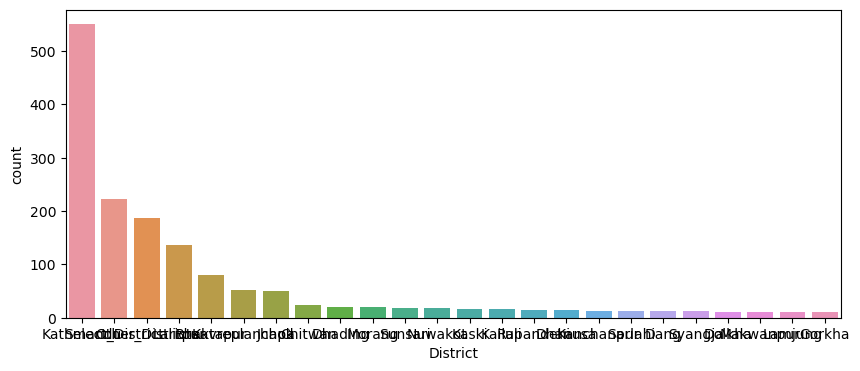

In [499]:
# visualizing the spread of data in 'Country' column

plt.figure(figsize=(10,4))
order=data['District'].value_counts().index
sns.countplot(x='District', data=data, order=order)

plt.show()

In [500]:
data['District'].value_counts()

Kathmandu          550
Select_District    223
Other_Districts    187
Lalitpur           137
Bhaktapur           80
Kavreplanchok       51
Jhapa               50
Chitwan             24
Dhading             19
Morang              19
Sunsari             18
Nuwakot             18
Kaski               17
Kailali             16
Rupandehi           15
Dhanusa             14
Kanchanpur          13
Sarlahi             12
Dang                12
Syangja             12
Dolkha              11
Makwanpur           11
Lamjung             10
Gorkha              10
Name: District, dtype: int64

In [501]:
data['District'] = data['District'].replace('Select_District', 'Other_Districts')

In [502]:
data['District'].value_counts()

Kathmandu          550
Other_Districts    410
Lalitpur           137
Bhaktapur           80
Kavreplanchok       51
Jhapa               50
Chitwan             24
Dhading             19
Morang              19
Nuwakot             18
Sunsari             18
Kaski               17
Kailali             16
Rupandehi           15
Dhanusa             14
Kanchanpur          13
Dang                12
Syangja             12
Sarlahi             12
Makwanpur           11
Dolkha              11
Lamjung             10
Gorkha              10
Name: District, dtype: int64

#### Cleaning and Structuring Variable : Education Background

In [503]:
data['Education Background'].value_counts()

Intermediate Level                          374
Intermediate level                          165
Bachelor of Business Administration         150
Select_EB                                   145
GED                                          62
                                           ... 
BSc (Hons) Computing                          1
Bachelor's in Information Management          1
Bachelor of Business Admnistration            1
Bachelors In Business Information System      1
28.15                                         1
Name: Education Background, Length: 246, dtype: int64

In [504]:
data = data[data['Education Background'] != '27']

In [505]:
data = data[data['Education Background'] != '26.57']

In [506]:
data = data[data['Education Background'] != '2.5']

In [507]:
data = data[data['Education Background'] != '28.13']

In [508]:
data = data[data['Education Background'] != '23.45']

In [509]:
data = data[data['Education Background'] != '30']

In [510]:
data = data[data['Education Background'] != '28.15']

In [511]:
data = data[data['Education Background'] != '23 .45']

In [512]:
def group_low_value_counts(data, column_name, threshold=10):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Other_EB'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Education Background', threshold=10)

In [513]:
unique_values = data['Education Background'].unique()
unique_values

array(['Bachelor of Business Administration', 'Other_EB',
       "Bachelor's Degree in Business Studies",
       "Bachelor's Degree in Computer Engineering",
       'Bachelor of Science in Agriculture',
       'Bachelor of Business Administration in Banking and Insurance',
       'Select_EB', 'Bachelor', 'GED', 'Intermediate level- Sceince ',
       'Intermediate level- Commerce ', 'A level', 'Intermediate Level',
       'GED-Testing', 'GCE A-Level', 'Intermediate level', 'A Level',
       'Intermediate Level '], dtype=object)

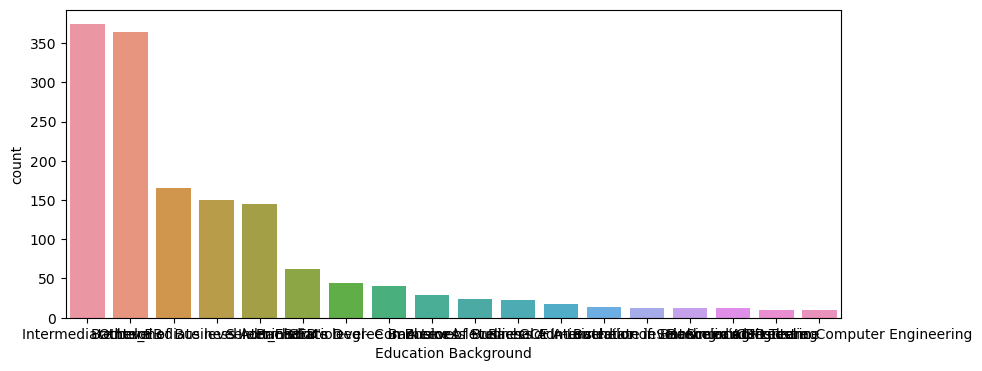

In [514]:
# visualizing the spread of data in 'Country' column

plt.figure(figsize=(10,4))
order=data['Education Background'].value_counts().index
sns.countplot(x='Education Background', data=data, order=order)

plt.show()

In [515]:
data['Education Background'].value_counts()

Intermediate Level                                              374
Other_EB                                                        364
Intermediate level                                              165
Bachelor of Business Administration                             150
Select_EB                                                       145
GED                                                              62
Intermediate level- Commerce                                     44
Bachelor's Degree in Business Studies                            40
A Level                                                          29
A level                                                          24
Bachelor                                                         22
GCE A-Level                                                      17
Bachelor of Business Administration in Banking and Insurance     13
Intermediate level- Sceince                                      12
Bachelor of Science in Agriculture              

#### Cleaning and Structuring Variable : Status

In [516]:
data['Status'].value_counts()

Graduate                 687
Running                  433
Withdrawn                287
Select_Status             55
Readmission-Withdrawn     20
Readmission-Running       16
Readmission- Graduate      7
Name: Status, dtype: int64

In [517]:
# putting the values with less than 100 occurences in one category - other

lis_ls = ['Readmission-Withdrawn','Readmission-Running','Readmission- Graduate']

data['Status'] = data['Status'].apply(lambda x : 'Select_Status' if x in lis_ls else x)


In [518]:
data['Status'].value_counts()

Graduate         687
Running          433
Withdrawn        287
Select_Status     98
Name: Status, dtype: int64

#### Cleaning and Structuring Variable : Actual Concentration

In [519]:
data['Actual Concentration'].value_counts()

Select_AC                            290
No Concentration                     264
Entrepreneurship                     217
Human Resources Management           144
Marketing Management                 137
Financial Management                 122
Digital Marketing                     70
Pending                               57
Technology and Innovation             51
Agribusiness Management               34
Nonprofit Management                  26
Investment and Economics              24
Digital Marketing                     11
Investment & Economics                 9
Data Analytics                         8
Dual (Entrepreneurship & HRM)          7
Dual (Entrepreneurship & Finance)      6
Financial Management                   6
Dual (Marketing and HRM)               6
Dual (Finance & Marketing)             4
Dual (Finance & HRM)                   3
Applied Art and Design                 3
Dual (Marketing & HRM)                 3
Dual ( Marketing and Finance)          1
Applied Art and 

In [520]:
def group_low_value_counts(data, column_name, threshold=10):
    """
    Group low-value counts in a column into an 'Others' category.

    Parameters:
        df (pandas DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to process.
        threshold (int): The threshold below which data will be grouped into 'Others'.
                         Defaults to 100.

    Returns:
        pandas DataFrame: The updated DataFrame with 'Others' category.
    """
    # Count the occurrences of each value in the column
    value_counts = data[column_name].value_counts()

    # Identify values with counts below the threshold
    low_value_counts = value_counts[value_counts < threshold].index

    # Replace those values with 'Others'
    data.loc[data[column_name].isin(low_value_counts), column_name] = 'Other_AC'

    return data

# Example usage:
# Assuming your DataFrame is called 'data' and the column to process is 'category_column'
data = group_low_value_counts(data, 'Actual Concentration', threshold=10)

In [521]:
data['Actual Concentration'].value_counts()

Select_AC                      290
No Concentration               264
Entrepreneurship               217
Human Resources Management     144
Marketing Management           137
Financial Management           122
Digital Marketing               70
Other_AC                        58
Pending                         57
Technology and Innovation       51
Agribusiness Management         34
Nonprofit Management            26
Investment and Economics        24
Digital Marketing               11
Name: Actual Concentration, dtype: int64

#### Cleaning and Structuring Variable : GPA

In [522]:
unique_values = data['GPA'].unique()
unique_values

array(['3.41', '3.08', '2.86', '2.99', '2.6', '2.52', '2.81', '2.21',
       '3.6', '0.3757', '3.11', '0.71', '0.674', '0.512', '0.6', '3.31',
       '52.65', '3.64', '3.76', '3.61', '69.38', '69.33', '3.65', '83.67',
       '2.61', '44.05', '65.65', '2.92', '2.41', '2.98', '2.79', '8.07',
       '3.9', '40.86', '47.45', '71.24', '2.65', '2.85', '68.41', '2.82',
       '3.12', '2.58', '3.07', '5.6', '2.51', '2.63', '68.43', '2720',
       '2.55', '8.2', '3.53', '3.27', '52.64', '62.75', '48.3', '2.62',
       '76.1', '2.8', '70.9', '61', '59', '3.5', '77', '55', '80.4', '57',
       '70.1', '56', '61.1', '60', '74.8', '67.5', '2.5', '3.02', '74.1',
       '57.8', '74.9', '5.1', '74.7', '59.1', '-2.5', '65.7', '72.7',
       '85.4', '72.8', '73.1', '78', '73.4', '71.9', '49.2', '73',
       '63.56', '62.1', '27', '81', '78.9', '69.4', '70.2', '68.6', '74',
       '62', '68.5', '48.2', '70.89', '70.4', '59.6', '58.2', '76',
       '56.6', '84', '54', '5.3', '69', '60.8', '56.5', '64.5', 

In [523]:
data['GPA'] = data['GPA'].replace('2.4 GPA', '2.4')

In [524]:
data['GPA'] = data['GPA'].replace('3.17/68', '3.17')

In [525]:
data['GPA'] = data['GPA'].replace('Grade 11(3.28) grade 12(3.52)', '3.28')

In [526]:
data['GPA'] = data['GPA'].replace('3.5-A level', '3.5')

In [527]:
data['GPA'] = data['GPA'].replace('3.5 credit', '3.5')

In [528]:
data['GPA'] = data['GPA'].replace('3 Credit', '3.0')

In [529]:
data['GPA'] = data['GPA'].replace('629 or 3.2', '3.2')

In [530]:
data['GPA'] = data['GPA'].replace('4.5 Crdit', '4.5')

In [531]:
data['GPA'] = data['GPA'].replace('A3.44', '3.44')

In [532]:
data['GPA'] = data['GPA'].replace('-2.5', '2.5')

In [533]:
data = data[data['GPA'] != 'GS']

In [534]:
data = data[data['GPA'] != 'A']

In [535]:
data

,Program,Enrollment Year,Gender,District,Country,Education Background,GPA,Professional Engagement,Mothers Profession,Fathers Profession,Status,Actual Concentration
1,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,3.41,PE_Unemployed,Businesswoman,Businessman,Withdrawn,Pending
2,MBA,2019.0,Male,Kaski,Nepal,Bachelor of Business Administration,3.08,PE_Unemployed,HouseWife,Businessman,Graduate,Marketing Management
3,MBA,2019.0,Female,Other_Districts,Nepal,Bachelor of Business Administration,2.86,PE_Employed,Employee_Mother,Employee_Father,Graduate,Entrepreneurship
4,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,2.99,PE_Employed,HouseWife,Businessman,Withdrawn,Pending
5,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,2.6,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...
2570,BSIT,2023.0,Male,Bhaktapur,Nepal,Intermediate Level,2.61,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
2571,BSIT,2023.0,Male,Other_Districts,Nepal,A Level,3.5,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
2572,BSIT,2023.0,Male,Kailali,Nepal,Intermediate Level,2.96,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
2573,BSIT,2023.0,Male,Kailali,Nepal,Intermediate Level,3.53,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC


In [536]:
data_cleaned=data.reset_index(drop=True)

In [537]:
data_cleaned

,Program,Enrollment Year,Gender,District,Country,Education Background,GPA,Professional Engagement,Mothers Profession,Fathers Profession,Status,Actual Concentration
0,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,3.41,PE_Unemployed,Businesswoman,Businessman,Withdrawn,Pending
1,MBA,2019.0,Male,Kaski,Nepal,Bachelor of Business Administration,3.08,PE_Unemployed,HouseWife,Businessman,Graduate,Marketing Management
2,MBA,2019.0,Female,Other_Districts,Nepal,Bachelor of Business Administration,2.86,PE_Employed,Employee_Mother,Employee_Father,Graduate,Entrepreneurship
3,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,2.99,PE_Employed,HouseWife,Businessman,Withdrawn,Pending
4,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,2.6,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,BSIT,2023.0,Male,Bhaktapur,Nepal,Intermediate Level,2.61,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
1499,BSIT,2023.0,Male,Other_Districts,Nepal,A Level,3.5,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
1500,BSIT,2023.0,Male,Kailali,Nepal,Intermediate Level,2.96,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC
1501,BSIT,2023.0,Male,Kailali,Nepal,Intermediate Level,3.53,Select_PE,Select_MothersP,Select_FathersP,Running,Select_AC


In [538]:
data_cleaned['GPA'].head(10)

0      3.41
1      3.08
2      2.86
3      2.99
4       2.6
5      2.52
6      2.81
7      2.21
8       3.6
9    0.3757
Name: GPA, dtype: object

In [539]:
data_cleaned['GPA'] = data_cleaned['GPA'].astype(float)

In [540]:
data_cleaned['GPA'] = data_cleaned['GPA'].round(2)

In [541]:
data_cleaned['Scholarship'] = (data_cleaned['GPA'] > 4.0).astype(int)

In [542]:
data_cleaned.drop('GPA', axis = 1, inplace=True)

In [543]:
data_cleaned.head(10)

,Program,Enrollment Year,Gender,District,Country,Education Background,Professional Engagement,Mothers Profession,Fathers Profession,Status,Actual Concentration,Scholarship
0,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,PE_Unemployed,Businesswoman,Businessman,Withdrawn,Pending,0
1,MBA,2019.0,Male,Kaski,Nepal,Bachelor of Business Administration,PE_Unemployed,HouseWife,Businessman,Graduate,Marketing Management,0
2,MBA,2019.0,Female,Other_Districts,Nepal,Bachelor of Business Administration,PE_Employed,Employee_Mother,Employee_Father,Graduate,Entrepreneurship,0
3,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,HouseWife,Businessman,Withdrawn,Pending,0
4,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
5,MBA,2019.0,Female,Sunsari,Nepal,Bachelor of Business Administration,PE_Unemployed,HouseWife,Businessman,Withdrawn,Pending,0
6,MBA,2019.0,Female,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
7,MBA,2019.0,Female,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
8,MBA,2019.0,Female,Other_Districts,Nepal,Bachelor of Business Administration,PE_Employed,Employee_Mother,Government_Workers_Father,Withdrawn,Pending,0
9,MBA,2019.0,Male,Dang,Nepal,Bachelor's Degree in Business Studies,PE_Employed,Select_MothersP,Select_FathersP,Graduate,Entrepreneurship,0


In [544]:
data_cleaned.isnull().sum()

Program                    0
Enrollment Year            0
Gender                     0
District                   0
Country                    0
Education Background       0
Professional Engagement    0
Mothers Profession         0
Fathers Profession         0
Status                     0
Actual Concentration       0
Scholarship                0
dtype: int64

#### Creating Dummies for all the categorical variables 

In [545]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Program                  1503 non-null   object
 1   Enrollment Year          1503 non-null   object
 2   Gender                   1503 non-null   object
 3   District                 1503 non-null   object
 4   Country                  1503 non-null   object
 5   Education Background     1503 non-null   object
 6   Professional Engagement  1503 non-null   object
 7   Mothers Profession       1503 non-null   object
 8   Fathers Profession       1503 non-null   object
 9   Status                   1503 non-null   object
 10  Actual Concentration     1503 non-null   object
 11  Scholarship              1503 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 141.0+ KB


#### Variable One : Program

In [546]:
program_dummy = pd.get_dummies(data_cleaned['Program'], drop_first = True)
program_dummy.head()

,BSIT,MBA,Select_P
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


#### Variable Two : Enrollment Year

In [547]:
Enrollment_Year_dummy = pd.get_dummies(data_cleaned['Enrollment Year'], drop_first = True)
Enrollment_Year_dummy.head()

,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,Select_EY
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0


#### Variable Three : Gender

In [548]:
Gender_dummy = pd.get_dummies(data_cleaned['Gender'], drop_first = True)
Gender_dummy.head()

,Male,Select_G
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0


#### Variable Four : District

In [549]:
District_dummy = pd.get_dummies(data_cleaned['District'], drop_first = True)
District_dummy.head()

,Chitwan,Dang,Dhading,Dhanusa,Dolkha,Gorkha,Jhapa,Kailali,Kanchanpur,Kaski,...,Lalitpur,Lamjung,Makwanpur,Morang,Nuwakot,Other_Districts,Rupandehi,Sarlahi,Sunsari,Syangja
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Variable Five : Country

In [550]:
Country_dummy = pd.get_dummies(data_cleaned['Country'], drop_first = True)
Country_dummy.head()

,Select_Country
0,0
1,0
2,0
3,0
4,0


#### Variable Six : Education Background

In [551]:
Education_Background_dummy = pd.get_dummies(data_cleaned['Education Background'], drop_first = True)
Education_Background_dummy.head()

,A level,Bachelor,Bachelor of Business Administration,Bachelor of Business Administration in Banking and Insurance,Bachelor of Science in Agriculture,Bachelor's Degree in Business Studies,Bachelor's Degree in Computer Engineering,GCE A-Level,GED,GED-Testing,Intermediate Level,Intermediate Level,Intermediate level,Intermediate level- Commerce,Intermediate level- Sceince,Other_EB,Select_EB
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Variable Seven : Professional Engagement

In [552]:
Professional_Engagement_dummy = pd.get_dummies(data_cleaned['Professional Engagement'], drop_first = True)
Professional_Engagement_dummy.head()

,PE_Entrepreneur,PE_Unemployed,Select_PE
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


#### Variable Eight : Mothers Profession

In [553]:
Mothers_Profession_dummy = pd.get_dummies(data_cleaned['Mothers Profession'], drop_first = True)
Mothers_Profession_dummy.head()

,Employee_Mother,Government_Workers_Mother,HouseWife,Select_MothersP
0,0,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


#### Variable Nine : Fathers Profession

In [554]:
Fathers_Profession_dummy = pd.get_dummies(data_cleaned['Fathers Profession'], drop_first = True)
Fathers_Profession_dummy.head()

,Employee_Father,Government_Workers_Father,Select_FathersP
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,1


#### Variable Ten : Status

In [555]:
Status_dummy = pd.get_dummies(data_cleaned['Status'], drop_first = True)
Status_dummy.head()

,Running,Select_Status,Withdrawn
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,1


#### Variable Eleven : Actual Concentration

In [556]:
Actual_Concentration_dummy = pd.get_dummies(data_cleaned['Actual Concentration'], drop_first = True)
Actual_Concentration_dummy.head()

,Digital Marketing,Digital Marketing,Entrepreneurship,Financial Management,Human Resources Management,Investment and Economics,Marketing Management,No Concentration,Nonprofit Management,Other_AC,Pending,Select_AC,Technology and Innovation
0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Variable Tweleve : Scholarship

In [557]:
Scholarship = data_cleaned['Scholarship']

#### Variable Thirteen : Student ID

In [558]:
Student_Id = pd.DataFrame({'Student ID': range(1, 1504)})

In [559]:
#### Putting all the dummy dataframe together 

final = pd.concat([Student_Id, Scholarship, Gender_dummy, Country_dummy, District_dummy, Mothers_Profession_dummy, Fathers_Profession_dummy, Education_Background_dummy, Enrollment_Year_dummy, program_dummy, Actual_Concentration_dummy, Status_dummy, Professional_Engagement_dummy],axis =1)
final

,Student ID,Scholarship,Male,Select_G,Select_Country,Chitwan,Dang,Dhading,Dhanusa,Dolkha,...,Other_AC,Pending,Select_AC,Technology and Innovation,Running,Select_Status,Withdrawn,PE_Entrepreneur,PE_Unemployed,Select_PE
0,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1499,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1499,1500,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1500,1501,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1501,1502,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


## C. Dividing into train test data

In [560]:
# importing relevant libraries 

import sklearn
from sklearn.model_selection import train_test_split

In [561]:
final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)

print(final_train.shape)
print(final_test.shape)

(1052, 82)
(451, 82)


In [562]:
final_train.head()

,Student ID,Scholarship,Male,Select_G,Select_Country,Chitwan,Dang,Dhading,Dhanusa,Dolkha,...,Other_AC,Pending,Select_AC,Technology and Innovation,Running,Select_Status,Withdrawn,PE_Entrepreneur,PE_Unemployed,Select_PE
355,356,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,626,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1478,1479,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
637,638,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
487,488,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## D. Creating the test train split 

In [563]:
from sklearn.model_selection import train_test_split

In [564]:
x = final.drop(['Scholarship'], axis =1)

In [565]:
x.head()

,Student ID,Male,Select_G,Select_Country,Chitwan,Dang,Dhading,Dhanusa,Dolkha,Gorkha,...,Other_AC,Pending,Select_AC,Technology and Innovation,Running,Select_Status,Withdrawn,PE_Entrepreneur,PE_Unemployed,Select_PE
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [566]:
y = final['Scholarship']

In [567]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Scholarship, dtype: int64

In [568]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [569]:
# calculating the conversion rate

conversion = sum(final['Scholarship'])/len(final['Scholarship'].index)
conversion

0.3253493013972056

- We have a converstion rate of 32.53 percentage 

## E. Building the first model

In [570]:
import statsmodels.api as sm

In [571]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 1052
Model:                            GLM   Df Residuals:                      970
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -298.82
Date:                Mon, 14 Aug 2023   Deviance:                       597.64
Time:                        07:41:16   Pearson chi2:                     686.
No. Iterations:                    25   Pseudo R-squ. (CS):             0.4943
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                          -28.9388   2.26e+04     -0.001      0.999   -4.43e+04    4.43e+04
Student ID                                                       0.0007      0.001      0.457      0.648      -0.002       0.004
Male                                                             0.4373      0.232      1.886      0.059      -0.017       0.892
Select_G                                                       -24.5445   1.66e+05     -0.000      1.000   -3.25e+05    3.25e+05
Select_Country                                                   2.9514      0.629      4.696      0.000       1.720       4.183
Chitwan                                                         -0.4154      0.912     -0.456      0.649      -2.203       1.372
Dang                                                           -26.3068   5.64e+04     -0.000      1.000   -1.11e+05    1.11e+05
Dhading                                                        -21.6775   6.53e+04     -0.000      1.000   -1.28e+05    1.28e+05
Dhanusa                                                          0.8654      1.587      0.545      0.586      -2.245       3.976
Dolkha                                                           0.9453      1.225      0.771      0.440      -1.456       3.347
Gorkha                                                           2.0718      1.857      1.116      0.264      -1.567       5.711
Jhapa                                                            1.1776      0.783      1.505      0.132      -0.356       2.711
Kailali                                                          2.2005      1.598      1.377      0.169      -0.932       5.333
Kanchanpur                                                       1.5315      1.364      1.123      0.261      -1.141       4.204
Kaski                                                            0.3034      1.069      0.284      0.776      -1.791       2.398
Kathmandu                                                        0.4264      0.565      0.754      0.451      -0.681       1.534
Kavreplanchok                                                    0.1511      0.848      0.178      0.859      -1.511       1.813
Lalitpur                                                         0.5140      0.651      0.790      0.430      -0.761       1.789
Lamjung                                                         -0.3453      1.149     -0.301      0.764      -2.597       1.907
Makwanpur                                                        0.3950      1.306      0.302      0.762      -2.166       2.956
Morang                                                           2.9341      1.123      2.613      0.009       0.733

In [572]:
x_train.drop('Select_G', axis = 1, inplace = True)

In [573]:
x_train.drop('Dang', axis = 1, inplace = True)

In [574]:
x_train.drop('Dhading', axis = 1, inplace = True)

In [575]:
x_train.drop('Bachelor', axis = 1, inplace = True)

In [576]:
x_train.drop('Bachelor of Business Administration in Banking and Insurance', axis = 1, inplace = True)

In [577]:
x_train.drop('Bachelor of Science in Agriculture', axis = 1, inplace = True)

In [578]:
x_train.drop("Bachelor's Degree in Business Studies", axis = 1, inplace = True)

In [579]:
x_train.drop('GCE A-Level', axis = 1, inplace = True)

In [580]:
x_train.drop('GED-Testing', axis = 1, inplace = True)

In [581]:
x_train.drop('Intermediate Level', axis = 1, inplace = True)

In [582]:
x_train.drop('Intermediate level', axis = 1, inplace = True)

In [583]:
x_train.drop(2017.0, axis = 1, inplace = True)

In [584]:
x_train.drop(2018.0, axis = 1, inplace = True)

In [585]:
x_train.drop(2019.0, axis = 1, inplace = True)

In [586]:
x_train.drop(2020.0, axis = 1, inplace = True)

In [587]:
x_train.drop(2021.0, axis = 1, inplace = True)

In [588]:
x_train.drop(2022.0, axis = 1, inplace = True)

In [589]:
x_train.drop(2016.0, axis = 1, inplace = True)

In [590]:
x_train.drop(2023.0, axis = 1, inplace = True)

In [591]:
x_train.drop('Select_EY', axis = 1, inplace = True)

In [592]:
x_train.drop('Select_P', axis = 1, inplace = True)

In [593]:
x_train.drop('Intermediate Level ', axis = 1, inplace = True)

In [594]:
x_train.drop('Investment and Economics ', axis = 1, inplace = True)

In [595]:
model = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 1052
Model:                            GLM   Df Residuals:                      993
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -369.32
Date:                Mon, 14 Aug 2023   Deviance:                       738.64
Time:                        07:41:17   Pearson chi2:                 1.30e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4218
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -5.2119      1.204     -4.328      0.000      -7.572      -2.852
Student ID                                    0.0005      0.001      0.576      0.564      -0.001       0.002
Male                                          0.3675      0.205      1.789      0.074      -0.035       0.770
Select_Country                                0.7654      0.312      2.449      0.014       0.153       1.378
Chitwan                                       0.2316      0.733      0.316      0.752      -1.206       1.669
Dhanusa                                      -0.0752      1.185     -0.063      0.949      -2.398       2.248
Dolkha                                        1.1753      1.095      1.073      0.283      -0.971       3.322
Gorkha                                        2.8401      1.303      2.179      0.029       0.286       5.395
Jhapa                                         1.2132      0.672      1.805      0.071      -0.104       2.531
Kailali                                       2.0951      1.165      1.798      0.072      -0.189       4.379
Kanchanpur                                    2.2607      1.235      1.831      0.067      -0.160       4.681
Kaski                                         0.4109      0.943      0.436      0.663      -1.438       2.259
Kathmandu                                     0.5588      0.445      1.255      0.209      -0.314       1.431
Kavreplanchok                                 0.3191      0.724      0.441      0.660      -1.100       1.739
Lalitpur                                      0.7485      0.533      1.404      0.160      -0.296       1.793
Lamjung                                      -0.0840      1.066     -0.079      0.937      -2.174       2.006
Makwanpur                                     0.4510      1.233      0.366      0.715      -1.966       2.868
Morang                                        2.5721      0.847      3.036      0.002       0.912       4.233
Nuwakot                                       0.5202      0.926      0.562      0.574      -1.294       2.335
Other_Districts                               0.2970      0.477      0.623      0.533      -0.637       1.232
Rupandehi                                     0.8159      0.860      0.948      0.343      -0.870       2.502
Sarlahi                                       1.8081      0.980      1.844      0.065      -0.114       3.730
Sunsari                                       0.3820      0.864      0.442      0.658      -1.311       2.075
Syangja                                       1.6475      1.141      1.444      0.149      -0.589       3.883
Employee_Mother                              -0.3218      0.411     -0.783      0.433      -1.127       0.483
Gov

## F. Selecting the Variables with RFE

In [596]:
# importing relevant libraries 

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()

In [597]:
x_train.columns = x_train.columns.astype(str)

In [598]:
# running Recursive Feature Elimination (RFE) 

from sklearn.feature_selection import RFE 
rfe = RFE(estimator=logreg, n_features_to_select = 10)

rfe = rfe.fit(x_train, y_train)

In [599]:
# creating a list of all the variables and their RFE rankings 

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Student ID', False, 49),
 ('Male', False, 19),
 ('Select_Country', False, 11),
 ('Chitwan', False, 26),
 ('Dhanusa', False, 15),
 ('Dolkha', False, 28),
 ('Gorkha', True, 1),
 ('Jhapa', False, 6),
 ('Kailali', True, 1),
 ('Kanchanpur', False, 2),
 ('Kaski', False, 40),
 ('Kathmandu', False, 42),
 ('Kavreplanchok', False, 20),
 ('Lalitpur', False, 33),
 ('Lamjung', False, 17),
 ('Makwanpur', False, 39),
 ('Morang', True, 1),
 ('Nuwakot', False, 41),
 ('Other_Districts', False, 16),
 ('Rupandehi', False, 31),
 ('Sarlahi', False, 3),
 ('Sunsari', False, 27),
 ('Syangja', True, 1),
 ('Employee_Mother', False, 21),
 ('Government_Workers_Mother', False, 32),
 ('HouseWife', False, 5),
 ('Select_MothersP', False, 4),
 ('Employee_Father', False, 43),
 ('Government_Workers_Father', False, 47),
 ('Select_FathersP', False, 30),
 ('A level', False, 9),
 ('Bachelor of Business Administration', True, 1),
 ("Bachelor's Degree in Computer Engineering", False, 7),
 ('GED', True, 1),
 ('Intermediate l

In [600]:
# storing the selected columns in col

col = x_train.columns[rfe.support_]

In [601]:
x_train[col].head()

,Gorkha,Kailali,Morang,Syangja,Bachelor of Business Administration,GED,Intermediate level- Sceince,MBA,Digital Marketing,Select_PE
355,0,0,0,0,0,0,0,1,0,0
625,0,0,0,0,1,0,0,1,0,0
1478,0,0,0,0,0,0,0,0,0,0
637,0,0,0,0,1,0,0,1,0,0
487,0,0,0,0,1,0,0,1,0,0


In [602]:
# checking the selected columns 

x_train.columns[rfe.support_]

Index(['Gorkha', 'Kailali', 'Morang', 'Syangja',
       'Bachelor of Business Administration', 'GED',
       'Intermediate level- Sceince ', 'MBA', 'Digital Marketing ',
       'Select_PE'],
      dtype='object')

## G. Building the Model Based on the selected variables 

In [603]:
# creating the model 

x_train_sm = sm.add_constant(x_train[col])
model_one = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
pred = model_one.fit()
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 1052
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -389.59
Date:                Mon, 14 Aug 2023   Deviance:                       779.18
Time:                        07:41:17   Pearson chi2:                 1.03e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -2.6458      0.238    -11.106      0.000      -3.113      -2.179
Gorkha                                  2.4403      1.179      2.070      0.038       0.130       4.750
Kailali                                 1.5240      1.130      1.349      0.177      -0.690       3.738
Morang                                  2.2638      0.715      3.166      0.002       0.862       3.665
Syangja                                 1.3393      1.110      1.207      0.228      -0.836       3.515
Bachelor of Business Administration    -2.6240      0.304     -8.626      0.000      -3.220      -2.028
GED                                     3.9520      0.416      9.492      0.000       3.136       4.768
Intermediate level- Sceince             2.9452      1.032      2.854      0.004       0.923       4.968
MBA                                     3.5673      0.256     13.941      0.000       3.066       4.069
Digital Marketing                      -0.7802      0.658     -1.186      0.236      -2.069       0.509
Select_PE                              -0.5988      0.258     -2.318      0.020      -1.105      -0.093
=======================================================================================================
"""

In [604]:
# importing relevant libraries 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [605]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train[col].columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train[col].values,i) for i in range (x_train[col].shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
4,Bachelor of Business Administration,1.29
8,Digital Marketing,1.05
5,GED,1.03
1,Kailali,1.01
2,Morang,1.01
3,Syangja,1.01
0,Gorkha,1.00
6,Intermediate level- Sceince,1.00
7,MBA,0.58
9,Select_PE,0.33


In [606]:
# Getting the predicted values on the train set

y_train_pred = pred.predict(x_train_sm)
y_train_pred[:10]

355     0.715343
625     0.154140
1478    0.066250
637     0.154140
487     0.154140
1022    0.037521
1420    0.066250
380     0.715343
966     0.037521
221     0.715343
dtype: float64

In [607]:
y_train_pred

355     0.715343
625     0.154140
1478    0.066250
637     0.154140
487     0.154140
          ...   
802     0.037521
53      0.154140
350     0.154140
79      0.715343
792     0.669830
Length: 1052, dtype: float64

In [608]:
y_train_pred = y_train_pred.values.reshape(-1)

In [609]:
y_train_pred[:10]

array([0.7153432 , 0.1541401 , 0.06624989, 0.1541401 , 0.1541401 ,
       0.03752067, 0.06624989, 0.7153432 , 0.03752067, 0.7153432 ])

In [610]:
# creating the columns 'Scholarship' and 'Scholarship_prob' for the dataframe y_train_final

y_train_final = pd.DataFrame({'Scholarship' :y_train.values, 'Scholarship_prob' : y_train_pred })

In [611]:
# creating a column 'Student ID' for the datframe y_train_final

y_train_final['Student ID'] = final['Student ID']

In [612]:
y_train_final.head()

,Scholarship,Scholarship_prob,Student ID
0,1,0.715343,1
1,0,0.154140,2
2,0,0.066250,3
3,0,0.154140,4
4,1,0.154140,5


In [613]:
# creating a column predicted with the cutoff at 0.5

y_train_final['predicted'] = y_train_final.Scholarship_prob.map(lambda x: 1 if x >0.5 else 0)

In [614]:
y_train_final.head()

,Scholarship,Scholarship_prob,Student ID,predicted
0,1,0.715343,1,1
1,0,0.154140,2,0
2,0,0.066250,3,0
3,0,0.154140,4,0
4,1,0.154140,5,0


In [615]:
# calculating the score and storing the information in the column 'score'

y_train_final['score'] = round(y_train_final['Scholarship_prob']*100,0)

In [616]:
y_train_final.head()

,Scholarship,Scholarship_prob,Student ID,predicted,score
0,1,0.715343,1,1,72.0
1,0,0.154140,2,0,15.0
2,0,0.066250,3,0,7.0
3,0,0.154140,4,0,15.0
4,1,0.154140,5,0,15.0


## Solution One

- The score in the 'score' column of y_train_final is the value we need as the first part of the solution for the problem

## H. Evaluating the Model

#### Checking the accuracy of the model

In [617]:
# importing relevant libraries 

from sklearn import metrics 

In [618]:
# creating the confusion matrix 

confusion = metrics.confusion_matrix(y_train_final.Scholarship, y_train_final.predicted)
print(confusion)

[[604 114]
 [ 48 286]]


In [619]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       604        114    
# churn            48      286

In [620]:
metrics.accuracy_score(y_train_final.Scholarship, y_train_final.predicted)

0.8460076045627376

#### Checking the further metrices 

In [621]:
# true positives
tp5train = confusion[1,1] 

#true negatives
tn5train = confusion[0,0]

# false positives
fp5train = confusion[0,1]

# false negatives
fn5train = confusion[1,0]

In [622]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sensitivity can also be termed as true positive rate 

tp5train /(tp5train+fn5train)

0.8562874251497006

The model has high specificity 

In [623]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn5train /(tn5train+fp5train)

0.841225626740947

The model has high specificity 

In [624]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp5train /(tn5train+fp5train)

0.15877437325905291

In [625]:
# false negative rate : A measure of how many 0s were predicted as 1 

fn5train /(tp5train+fn5train)

0.1437125748502994

#### Checking the ROC curve 

In [626]:
# importing relevant libraries 

import matplotlib.pyplot as plt

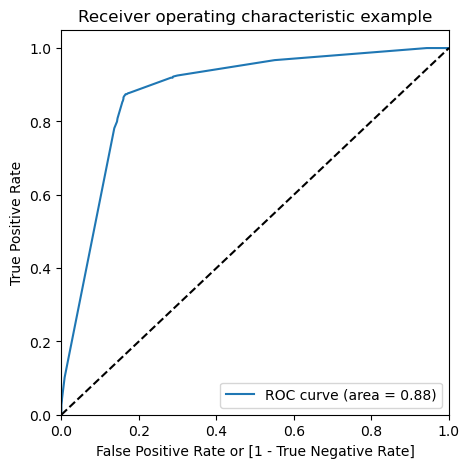

In [627]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final.Scholarship, y_train_final.Scholarship_prob)

#### Note

- The area under the ROC curve is 0.88 which depicts that the model is a good classifier

In [628]:
# checking different probablity cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i] = y_train_final.Scholarship_prob.map(lambda x:1 if x>i else 0)
y_train_final.head(10)

,Scholarship,Scholarship_prob,Student ID,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.715343,1,1,72.0,1,1,1,1,1,1,1,1,0,0
1,0,0.154140,2,0,15.0,1,1,0,0,0,0,0,0,0,0
2,0,0.066250,3,0,7.0,1,0,0,0,0,0,0,0,0,0
3,0,0.154140,4,0,15.0,1,1,0,0,0,0,0,0,0,0
4,1,0.154140,5,0,15.0,1,1,0,0,0,0,0,0,0,0
5,0,0.037521,6,0,4.0,1,0,0,0,0,0,0,0,0,0
6,0,0.066250,7,0,7.0,1,0,0,0,0,0,0,0,0,0
7,0,0.715343,8,1,72.0,1,1,1,1,1,1,1,1,0,0
8,0,0.037521,9,0,4.0,1,0,0,0,0,0,0,0,0,0
9,1,0.715343,10,1,72.0,1,1,1,1,1,1,1,1,0,0


In [629]:
# creating a dataframe with information about probability, accuracy, sensitivity and specificity 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

# tp = confusion[1,1]  true positive 
# tn = confusion[0,0]  true negatives
# fp = confusion[0,1]  false positives
# fn = confusion[1,0]  false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Scholarship, y_train_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.317490  1.000000  0.000000
0.1   0.1  0.778517  0.922156  0.711699
0.2   0.2  0.842205  0.877246  0.825905
0.3   0.3  0.845057  0.874251  0.831476
0.4   0.4  0.846958  0.874251  0.834262
0.5   0.5  0.846008  0.856287  0.841226
0.6   0.6  0.840304  0.808383  0.855153
0.7   0.7  0.837452  0.781437  0.863510
0.8   0.8  0.694867  0.041916  0.998607
0.9   0.9  0.693916  0.038922  0.998607


In [630]:
# If we have to be extremely sure : we can choose 0.1 because sensi is 92 percentage and accuracy 77 percentage
# If we have to save time then : we can choose 0.7 because accuracy : 83 sensi: 78

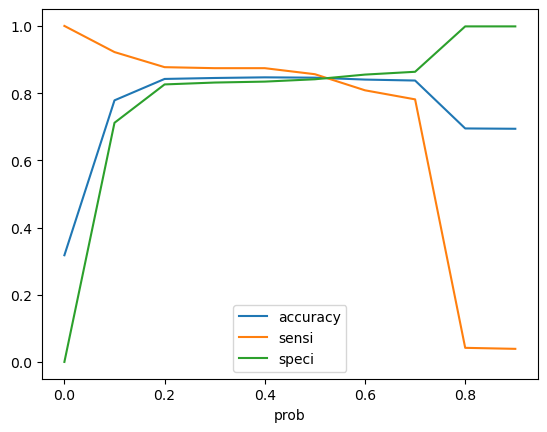

In [631]:
# plotting probability 

cutoff_df.plot.line(x= 'prob', y = ['accuracy','sensi','speci'])
plt.show()

#### Note

- According to the graph the optimal value of cutoff seems to be around 0.5

# Solution Two

## Case One : Sensitivity Focus - Maximizing Opportunities for Deserving Students (Low Threshold)

In [632]:
y_train_final['Max Students'] = y_train_final.Scholarship_prob.map(lambda x: 1 if x >0.1 else 0)

In [633]:
y_train_final['Max Students'].value_counts()

0    537
1    515
Name: Max Students, dtype: int64

In [634]:
max_students = y_train_final[y_train_final['Max Students'] == 1]

In [635]:
max_students.head(20)

,Scholarship,Scholarship_prob,Student ID,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Max Students
0,1,0.715343,1,1,72.0,1,1,1,1,1,1,1,1,0,0,1
1,0,0.154140,2,0,15.0,1,1,0,0,0,0,0,0,0,0,1
3,0,0.154140,4,0,15.0,1,1,0,0,0,0,0,0,0,0,1
4,1,0.154140,5,0,15.0,1,1,0,0,0,0,0,0,0,0,1
7,0,0.715343,8,1,72.0,1,1,1,1,1,1,1,1,0,0,1
9,1,0.715343,10,1,72.0,1,1,1,1,1,1,1,1,0,0,1
10,1,0.715343,11,1,72.0,1,1,1,1,1,1,1,1,0,0,1
12,0,0.154140,13,0,15.0,1,1,0,0,0,0,0,0,0,0,1
13,1,0.579966,14,1,58.0,1,1,1,1,1,1,0,0,0,0,1
14,1,0.579966,15,1,58.0,1,1,1,1,1,1,0,0,0,0,1


In [636]:
# Get the indices of the students with 'More Budget' value of 1 from y_train_final
indices_with_max_students = y_train_final[y_train_final['Max Students'] == 1].index

# Use those indices to retrieve the corresponding students from the data_cleaned DataFrame
max_students = data_cleaned.loc[indices_with_max_students]

# Print the result
max_students.head(20)

,Program,Enrollment Year,Gender,District,Country,Education Background,Professional Engagement,Mothers Profession,Fathers Profession,Status,Actual Concentration,Scholarship
0,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,PE_Unemployed,Businesswoman,Businessman,Withdrawn,Pending,0
1,MBA,2019.0,Male,Kaski,Nepal,Bachelor of Business Administration,PE_Unemployed,HouseWife,Businessman,Graduate,Marketing Management,0
3,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,HouseWife,Businessman,Withdrawn,Pending,0
4,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
7,MBA,2019.0,Female,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
9,MBA,2019.0,Male,Dang,Nepal,Bachelor's Degree in Business Studies,PE_Employed,Select_MothersP,Select_FathersP,Graduate,Entrepreneurship,0
10,MBA,2019.0,Female,Lalitpur,Nepal,Bachelor of Business Administration,PE_Employed,Businesswoman,Businessman,Withdrawn,Pending,0
12,MBA,2019.0,Male,Kavreplanchok,Nepal,Other_EB,PE_Unemployed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
13,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,PE_Employed,Employee_Mother,Employee_Father,Withdrawn,Pending,0
14,MBA,2019.0,Male,Kathmandu,Nepal,Other_EB,PE_Unemployed,HouseWife,Businessman,Graduate,Entrepreneurship,0


- When the college has increased funding and a strong commitment to support academic excellence and financial need, they can ensure 515 students the opportunity to benefit from the scholarships based on the cutoff of 0.1

#### Note

When we mark the model cutoff at 0.1, the college has 48 percent students (from the train set its 515/1052) to give scholarship during this period. The accuracy of the Model is not the greatest. However, we will not miss students who could get scholarship as the sensitivity of the model at this cutoff is very high.

This allows us to not miss any students who can get scholarships. 
Thus this impacts on the college as:

1. Positive Impact: More students will have access to financial support, aligning with the college's mission to foster academic excellence and support those in financial need. This can enhance the college's reputation and attract a more diverse student population.

## Case Two : Specificity Focus - Managing Scholarship Funds Responsibly (High Threshold)

In [637]:
y_train_final['Deserving Students'] = y_train_final.Scholarship_prob.map(lambda x: 1 if x >0.7 else 0)

In [638]:
y_train_final['Deserving Students'].value_counts()

0    693
1    359
Name: Deserving Students, dtype: int64

In [639]:
deserving_students = y_train_final[y_train_final['Deserving Students'] == 1]

In [640]:
deserving_students.head(20)

,Scholarship,Scholarship_prob,Student ID,predicted,score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Max Students,Deserving Students
0,1,0.715343,1,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
7,0,0.715343,8,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
9,1,0.715343,10,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
10,1,0.715343,11,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
15,1,0.715343,16,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
16,1,0.715343,17,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
17,1,0.715343,18,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
18,1,0.960277,19,1,96.0,1,1,1,1,1,1,1,1,1,1,1,1
19,1,0.715343,20,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1
23,1,0.715343,24,1,72.0,1,1,1,1,1,1,1,1,0,0,1,1


In [707]:
# Get the indices of the students with 'More Budget' value of 1 from y_train_final
indices_with_deserving_students = y_train_final[y_train_final['Deserving Students'] == 1].index

# Use those indices to retrieve the corresponding students from the data_cleaned DataFrame
deserving_students = data_cleaned.loc[indices_with_deserving_students]

# Print the result
deserving_students.head(20)

,Program,Enrollment Year,Gender,District,Country,Education Background,Professional Engagement,Mothers Profession,Fathers Profession,Status,Actual Concentration,Scholarship
0,MBA,2019.0,Male,Kathmandu,Nepal,Bachelor of Business Administration,PE_Unemployed,Businesswoman,Businessman,Withdrawn,Pending,0
7,MBA,2019.0,Female,Kathmandu,Nepal,Bachelor of Business Administration,PE_Employed,Select_MothersP,Select_FathersP,Withdrawn,Pending,0
9,MBA,2019.0,Male,Dang,Nepal,Bachelor's Degree in Business Studies,PE_Employed,Select_MothersP,Select_FathersP,Graduate,Entrepreneurship,0
10,MBA,2019.0,Female,Lalitpur,Nepal,Bachelor of Business Administration,PE_Employed,Businesswoman,Businessman,Withdrawn,Pending,0
15,MBA,2019.0,Male,Other_Districts,Nepal,Bachelor of Business Administration,PE_Unemployed,HouseWife,Businessman,Select_Status,Select_AC,0
16,MBA,2019.0,Male,Other_Districts,Nepal,Bachelor's Degree in Business Studies,PE_Unemployed,Employee_Mother,Select_FathersP,Graduate,Entrepreneurship,1
17,MBA,2019.0,Female,Kathmandu,Nepal,Bachelor of Business Administration,PE_Unemployed,HouseWife,Businessman,Graduate,Technology and Innovation,0
18,MBA,2019.0,Female,Sarlahi,Nepal,Bachelor of Business Administration,PE_Employed,Employee_Mother,Businessman,Graduate,Human Resources Management,0
19,MBA,2019.0,Female,Lalitpur,Nepal,Bachelor of Business Administration,PE_Employed,HouseWife,Employee_Father,Graduate,Entrepreneurship,0
23,MBA,2019.0,Female,Other_Districts,Nepal,Bachelor of Science in Agriculture,PE_Employed,Employee_Mother,Employee_Father,Graduate,Entrepreneurship,1


- When the college has limited funds and a focus on carefully managing scholarship allocations, they can ensure that scholarships are awarded to 359 most fitting students based on the cutoff of 0.7

#### Note

When we can mark the model cutoff at 0.7, the college has 34 percent students (from the train set its 359/1052) to give scholarship during this period. This percentage is very close to the actual conversion rate which is 32.5 percentage. The accuracy at this cutoff is almost the highest, the sensitivity is close to maximum and the college will end up giving scholarship to the most fitting students. 

This allows college to only focus on the students that are best fit for the scholarship. 
Thus this impacts on the college as:

1. Positive Impact: This approach ensures that scholarship funds are allocated responsibly, targeting only those students who strongly align with the scholarship criteria. It allows for more sustainable financial management, preserving funds for other college needs or future scholarship cycles.

# I. Making Predictions

In [642]:
final_test.head()

,Student ID,Scholarship,Male,Select_G,Select_Country,Chitwan,Dang,Dhading,Dhanusa,Dolkha,...,Other_AC,Pending,Select_AC,Technology and Innovation,Running,Select_Status,Withdrawn,PE_Entrepreneur,PE_Unemployed,Select_PE
680,681,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
515,516,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1479,1480,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
642,643,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
200,201,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [643]:
# using the features in the test dataframe that were used to create our model 

x_test = x_test[col]

In [644]:
x_test.head()

,Gorkha,Kailali,Morang,Syangja,Bachelor of Business Administration,GED,Intermediate level- Sceince,MBA,Digital Marketing,Select_PE
680,0,0,0,0,0,0,0,0,0,1
515,0,0,0,0,1,0,0,1,0,0
1479,0,0,0,0,0,0,0,0,0,0
642,0,0,0,0,1,0,0,1,0,0
200,0,0,0,0,0,0,0,1,0,0


In [645]:
# adding the constant to x_test

x_test_sm = sm.add_constant(x_test)

In [646]:
# creating the predictions based on the model 

y_test_pred = pred.predict(x_test_sm)
y_test_pred[:10]

680     0.037521
515     0.154140
1479    0.066250
642     0.154140
200     0.715343
981     0.037521
1294    0.037521
1346    0.037521
503     0.715343
987     0.037521
dtype: float64

In [647]:
# creating different columns to store the Scholarship situation and the probability for the same

y_test_final = pd.DataFrame({'Scholarship' : y_test.values, 'Scholarship_prob' : y_test_pred})

In [648]:
y_test_final.head()

,Scholarship,Scholarship_prob
680,1,0.037521
515,0,0.154140
1479,0,0.066250
642,0,0.154140
200,1,0.715343


In [649]:
# testing with a cutoff at 0.7 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Scholarship_prob.map(lambda x: 1 if x >0.7 else 0)

In [650]:
# creating the confusion matrix 

confusion_one = metrics.confusion_matrix(y_test_final.Scholarship, y_test_final.predicted)
print(confusion_one)

[[264  32]
 [ 35 120]]


In [651]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       264       32    
# churn            35      120

In [652]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.Scholarship, y_test_final.predicted))

0.8514412416851441


In [653]:
# true positives
tp7test = confusion_one[1,1] 

#true negatives
tn7test = confusion_one[0,0]

# false positives
fp7test = confusion_one[0,1]

# false negatives
fn7test = confusion_one[1,0]

In [654]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp7test /(tp7test+fn7test)

0.7741935483870968

In [655]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn7test /(tn7test+fp7test)

0.8918918918918919

In [656]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp7test /(tn7test+fp7test)

0.10810810810810811

In [657]:
# false negative rate : A measure of how many 0s were predicted as 1 

fn7test /(tp7test+fn7test)

0.22580645161290322

In [658]:
# testing with a cutoff at 0.3 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Scholarship_prob.map(lambda x: 1 if x >0.1 else 0)

In [659]:
# creating the confusion matrix 

confusion_test_1 = metrics.confusion_matrix(y_test_final.Scholarship, y_test_final.predicted)
print(confusion_one)

[[264  32]
 [ 35 120]]


In [660]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       204       92    
# churn            17      138

In [661]:
# the accuracy of the model 

print(metrics.accuracy_score(y_test_final.Scholarship, y_test_final.predicted))

0.7583148558758315


In [662]:
# true positives
tp1test = confusion_test_1[1,1] 

#true negatives
tn1test = confusion_test_1[0,0]

# false positives
fp1test = confusion_test_1[0,1]

# false negatives
fn1test = confusion_test_1[1,0]

In [663]:
# sensitivity of the model : A measure of how accurately does the model predict the positive outcomes
# sesitivity can also be termed as true positive rate 

tp1test /(tp1test+fn1test)

0.8903225806451613

In [664]:
# specificity of the model : A measure of how accurately does the model predict negative outcomes 

tn1test /(tn1test+fp1test)

0.6891891891891891

In [665]:
# false positive rate : A measure of how many 0s were predicted as 1 

fp1test /(tn1test+fp1test)

0.3108108108108108

In [666]:
# false negative rate : A measure of how many 0s were predicted as 1 

fn1test /(tp1test+fn1test)

0.10967741935483871

## Comparing train and test model

### Threshold at 0.1

In [667]:
y_train_final['predicted'] = y_train_final.Scholarship_prob.map(lambda x: 1 if x >0.1 else 0)

In [668]:
y_train_final['predicted'].value_counts()

0    537
1    515
Name: predicted, dtype: int64

- When the college has increased funding and a strong commitment to support academic excellence and financial need, they can ensure 515 students the opportunity to benefit from the scholarships based on the cutoff of 0.1

When we mark the model cutoff at 0.1, the college has 48 percent students (from the train set its 515/1052) to give scholarship during this period. The accuracy of the Model is not the greatest. However, we will not miss students who could get scholarship as the sensitivity of the model at this cutoff is very high.

This allows us to not miss any students who can get scholarships. 
Thus this impacts on the college as:

1. Positive Impact: More students will have access to financial support, aligning with the college's mission to foster academic excellence and support those in financial need. This can enhance the college's reputation and attract a more diverse student population.

In [669]:
confusion_train_1 = metrics.confusion_matrix(y_train_final.Scholarship, y_train_final.predicted)
confusion_train_1

array([[511, 207],
       [ 26, 308]])

In [670]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       511        207   
# churn            26      308

In [671]:
print(metrics.accuracy_score(y_train_final.Scholarship, y_train_final.predicted))

0.7785171102661597


In [672]:
# true positives
tp1train = confusion_train_1[1,1] 

#true negatives
tn1train = confusion_train_1[0,0]

# false positives
fp1train = confusion_train_1[0,1]

# false negatives
fn1train = confusion_train_1[1,0]

In [673]:
y_test_final['predicted'] = y_test_final.Scholarship_prob.map(lambda x: 1 if x >0.1 else 0)

In [674]:
y_test_final['predicted'].value_counts()

1    230
0    221
Name: predicted, dtype: int64

- When the college has increased funding and a strong commitment to support academic excellence and financial need, they can ensure 230 students the opportunity to benefit from the scholarships based on the cutoff of 0.1

When we mark the model cutoff at 0.1, the college has 50 percent students (from the train set its 230/451) to give scholarship during this period. The accuracy of the Model is not the greatest. However, we will not miss students who could get scholarship as the sensitivity of the model at this cutoff is very high.

This allows us to not miss any students who can get scholarships. 
Thus this impacts on the college as:

1. Positive Impact: More students will have access to financial support, aligning with the college's mission to foster academic excellence and support those in financial need. This can enhance the college's reputation and attract a more diverse student population.

In [675]:
confusion_test_1 = metrics.confusion_matrix(y_test_final.Scholarship, y_test_final.predicted)
confusion_test_1

array([[204,  92],
       [ 17, 138]])

In [676]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       204        92   
# churn            17      138

In [677]:
print(metrics.accuracy_score(y_test_final.Scholarship, y_test_final.predicted))

0.7583148558758315


In [678]:
# true positives
tp1test = confusion_test_1[1,1] 

#true negatives
tn1test = confusion_test_1[0,0]

# false positives
fp1test = confusion_test_1[0,1]

# false negatives
fn1test = confusion_test_1[1,0]

In [679]:
# sensitivity of the train model

tp1train /(tp1train+fn1train)

0.9221556886227545

In [680]:
# sensitivity of the test model

tp1test /(tp1test+fn1test)

0.8903225806451613

In [681]:
# specificity of the train model

tn1train /(tn1train+fp1train)

0.7116991643454039

In [682]:
# specificity of the test model

tn1test /(tn1test+fp1test)

0.6891891891891891

In [683]:
# false positive rate of the train model

fp1train /(tn1train+fp1train)

0.2883008356545961

In [684]:
# false positive rate of the test model

fp1test /(tn1test+fp1test)

0.3108108108108108

In [685]:
# false negative rate of the train model

fn1train /(tp1train+fn1train)

0.07784431137724551

In [686]:
# false negative rate of the test model

fn1test /(tp1test+fn1test)

0.10967741935483871

### Threshold at 0.7

In [687]:
y_train_final['predicted'] = y_train_final.Scholarship_prob.map(lambda x: 1 if x >0.7 else 0)

In [688]:
y_train_final['predicted'].value_counts()

0    693
1    359
Name: predicted, dtype: int64

- When the college has limited funds and a focus on carefully managing scholarship allocations, they can ensure that scholarships are awarded to 359 most fitting students based on the cutoff of 0.7

When we can mark the model cutoff at 0.7, the college has 34.1 percent students (from the train set its 359/1052) to give scholarship during this period. This percentage is very close to the actual conversion rate which is 32.5 percentage. The accuracy at this cutoff is almost the highest, the sensitivity is close to maximum and the college will end up giving scholarship to the most fitting students. 

This allows college to only focus on the students that are best fit for the scholarship. 
Thus this impacts on the college as:

1. Positive Impact: This approach ensures that scholarship funds are allocated responsibly, targeting only those students who strongly align with the scholarship criteria. It allows for more sustainable financial management, preserving funds for other college needs or future scholarship cycles.

In [689]:
confusion_train_7 = metrics.confusion_matrix(y_train_final.Scholarship, y_train_final.predicted)
confusion_train_7

array([[620,  98],
       [ 73, 261]])

In [690]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       620        98   
# churn            73      261

In [691]:
print(metrics.accuracy_score(y_train_final.Scholarship, y_train_final.predicted))

0.8374524714828897


In [692]:
# true positives
tp7train = confusion_train_7[1,1] 

#true negatives
tn7train = confusion_train_7[0,0]

# false positives
fp7train = confusion_train_7[0,1]

# false negatives
fn7train = confusion_train_7[1,0]

In [693]:
# testing with a cutoff at 0.5 . We can use different cutoffs as required 

y_test_final['predicted'] = y_test_final.Scholarship_prob.map(lambda x: 1 if x >0.7 else 0)

In [694]:
y_test_final['predicted'].value_counts()

0    299
1    152
Name: predicted, dtype: int64

- When the college has limited funds and a focus on carefully managing scholarship allocations, they can ensure that scholarships are awarded to 152 most fitting students based on the cutoff of 0.7

When we can mark the model cutoff at 0.7, the college has 33.7 percent students (from the train set its 152/451) to give scholarship during this period. This percentage is very close to the actual conversion rate which is 32.5 percentage. The accuracy at this cutoff is almost the highest, the sensitivity is close to maximum and the college will end up giving scholarship to the most fitting students. 

This allows college to only focus on the students that are best fit for the scholarship. 
Thus this impacts on the college as:

1. Positive Impact: This approach ensures that scholarship funds are allocated responsibly, targeting only those students who strongly align with the scholarship criteria. It allows for more sustainable financial management, preserving funds for other college needs or future scholarship cycles.

In [695]:
# creating the confusion matrix 

confusion_test_7 = metrics.confusion_matrix(y_test_final.Scholarship, y_test_final.predicted)
confusion_test_7

array([[264,  32],
       [ 35, 120]])

In [696]:
# Predicted     not-churn    churn 
# Actual                  
# not-churn       264        32   
# churn            35      120

In [697]:
print(metrics.accuracy_score(y_test_final.Scholarship, y_test_final.predicted))

0.8514412416851441


In [698]:
# true positives
tp7test = confusion_test_7[1,1] 

#true negatives
tn7test = confusion_test_7[0,0]

# false positives
fp7test = confusion_test_7[0,1]

# false negatives
fn7test = confusion_test_7[1,0]

In [699]:
# sensitivity of the train model

tp7train /(tp7train+fn7train)

0.781437125748503

In [700]:
# sensitivity of the test model

tp7test /(tp7test+fn7test)

0.7741935483870968

In [701]:
# specificity of the train model

tn7train /(tn7train+fp7train)

0.8635097493036211

In [702]:
# specificity of the test model

tn7test /(tn7test+fp7test)

0.8918918918918919

In [703]:
# false positive rate of the train model

fp7train /(tn7train+fp7train)

0.13649025069637882

In [704]:
# false positive rate of the test model

fp7test /(tn7test+fp7test)

0.10810810810810811

In [705]:
# false negative rate of the train model

fn7train /(tp7train+fn7train)

0.218562874251497

In [706]:
# false negative rate of the test model

fn7test /(tp7test+fn7test)

0.22580645161290322

### Note

1. Model works well 
2. The accuracy, sensitivity, specificity are very close to the one generated by the train set on a similar cutoff
3. We can select different cutoff to increase the accuracy, sensitivity and specificity based on the requirement of the case in context